<a href="https://colab.research.google.com/github/Shashwat26Bhatnagar/Myprofile/blob/main/denoisingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,21]
plt.rcParams.update({'font.size' : 18})


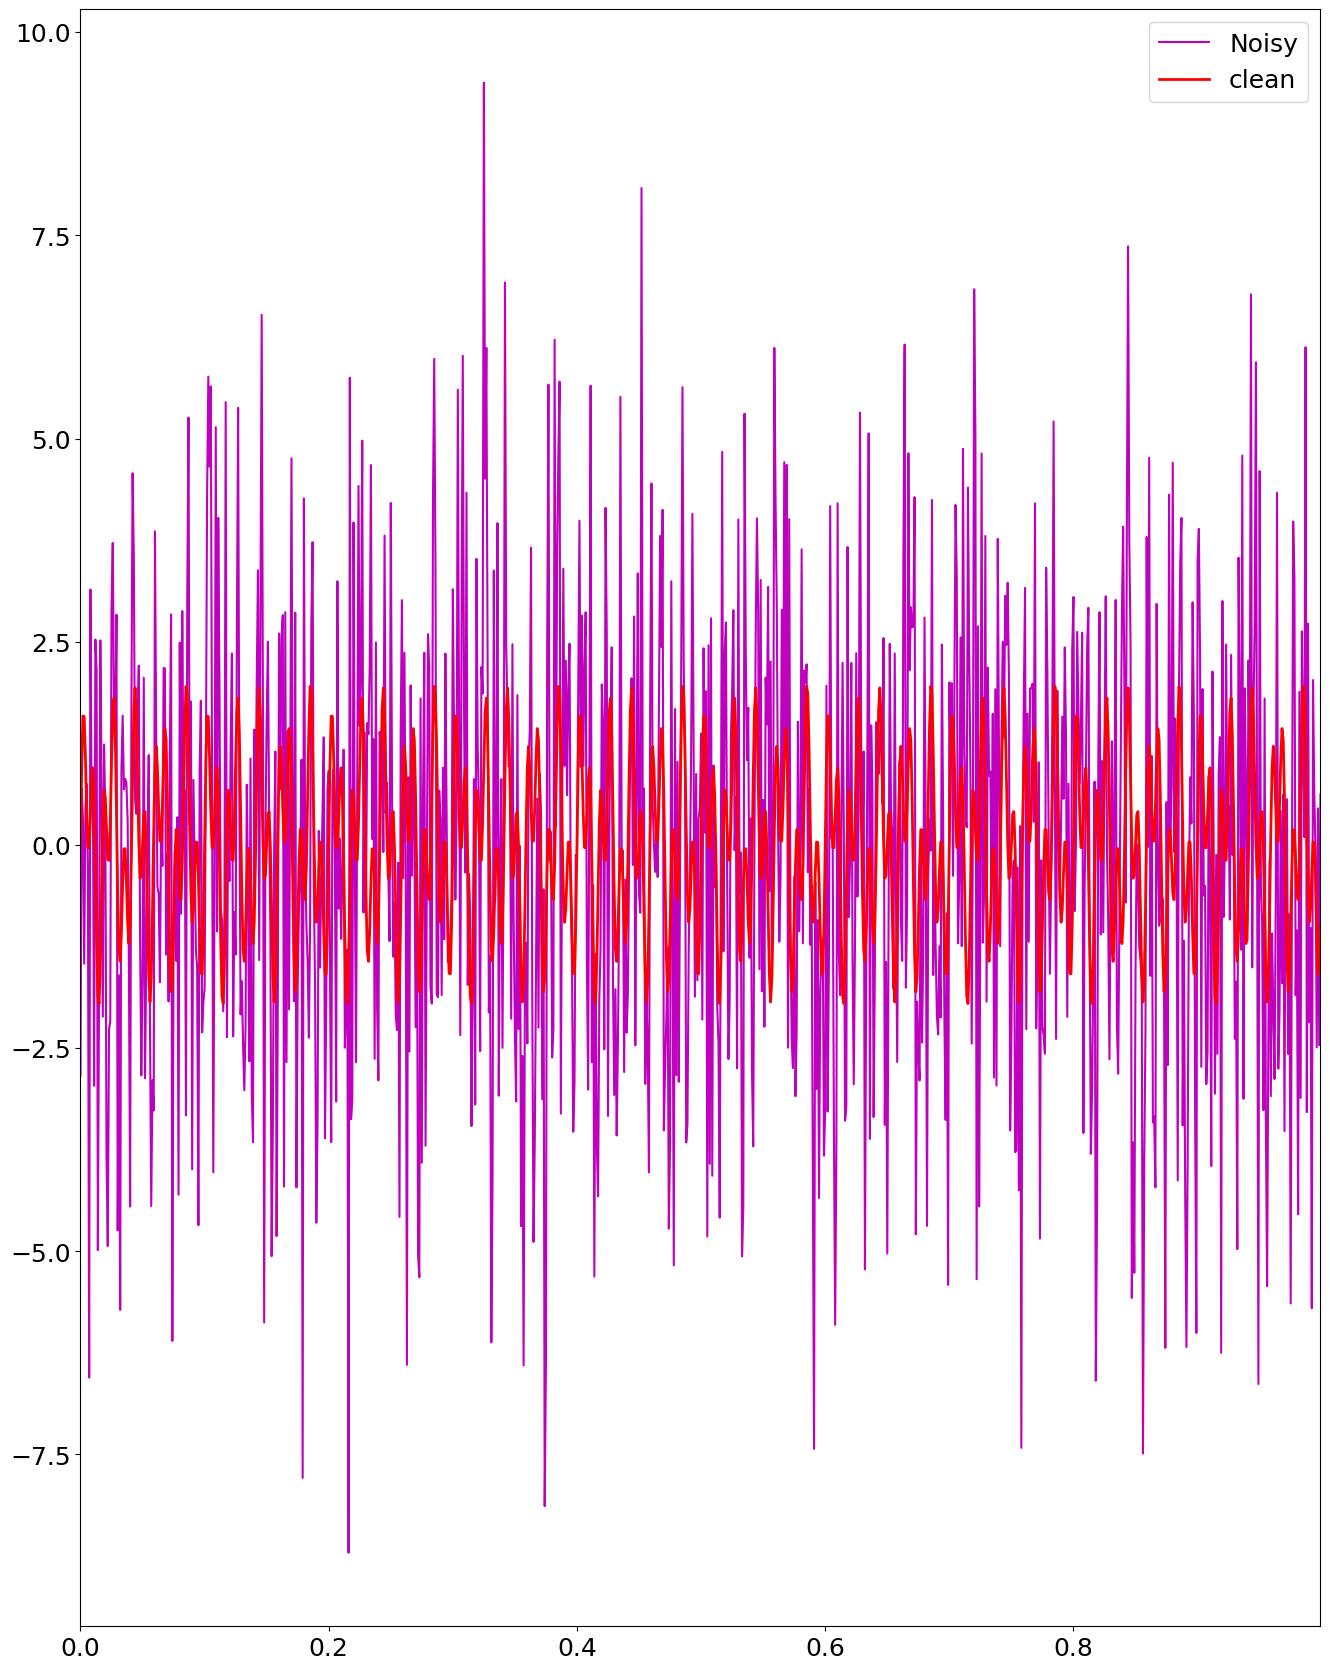

In [ ]:
#creating simple signal with two frequency
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)
f_clean=f
f=f+2.5*np.random.randn((len(t)))#just adding noise

plt.plot(t,f,color="m",linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color="r",linewidth=2,label="clean")
plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


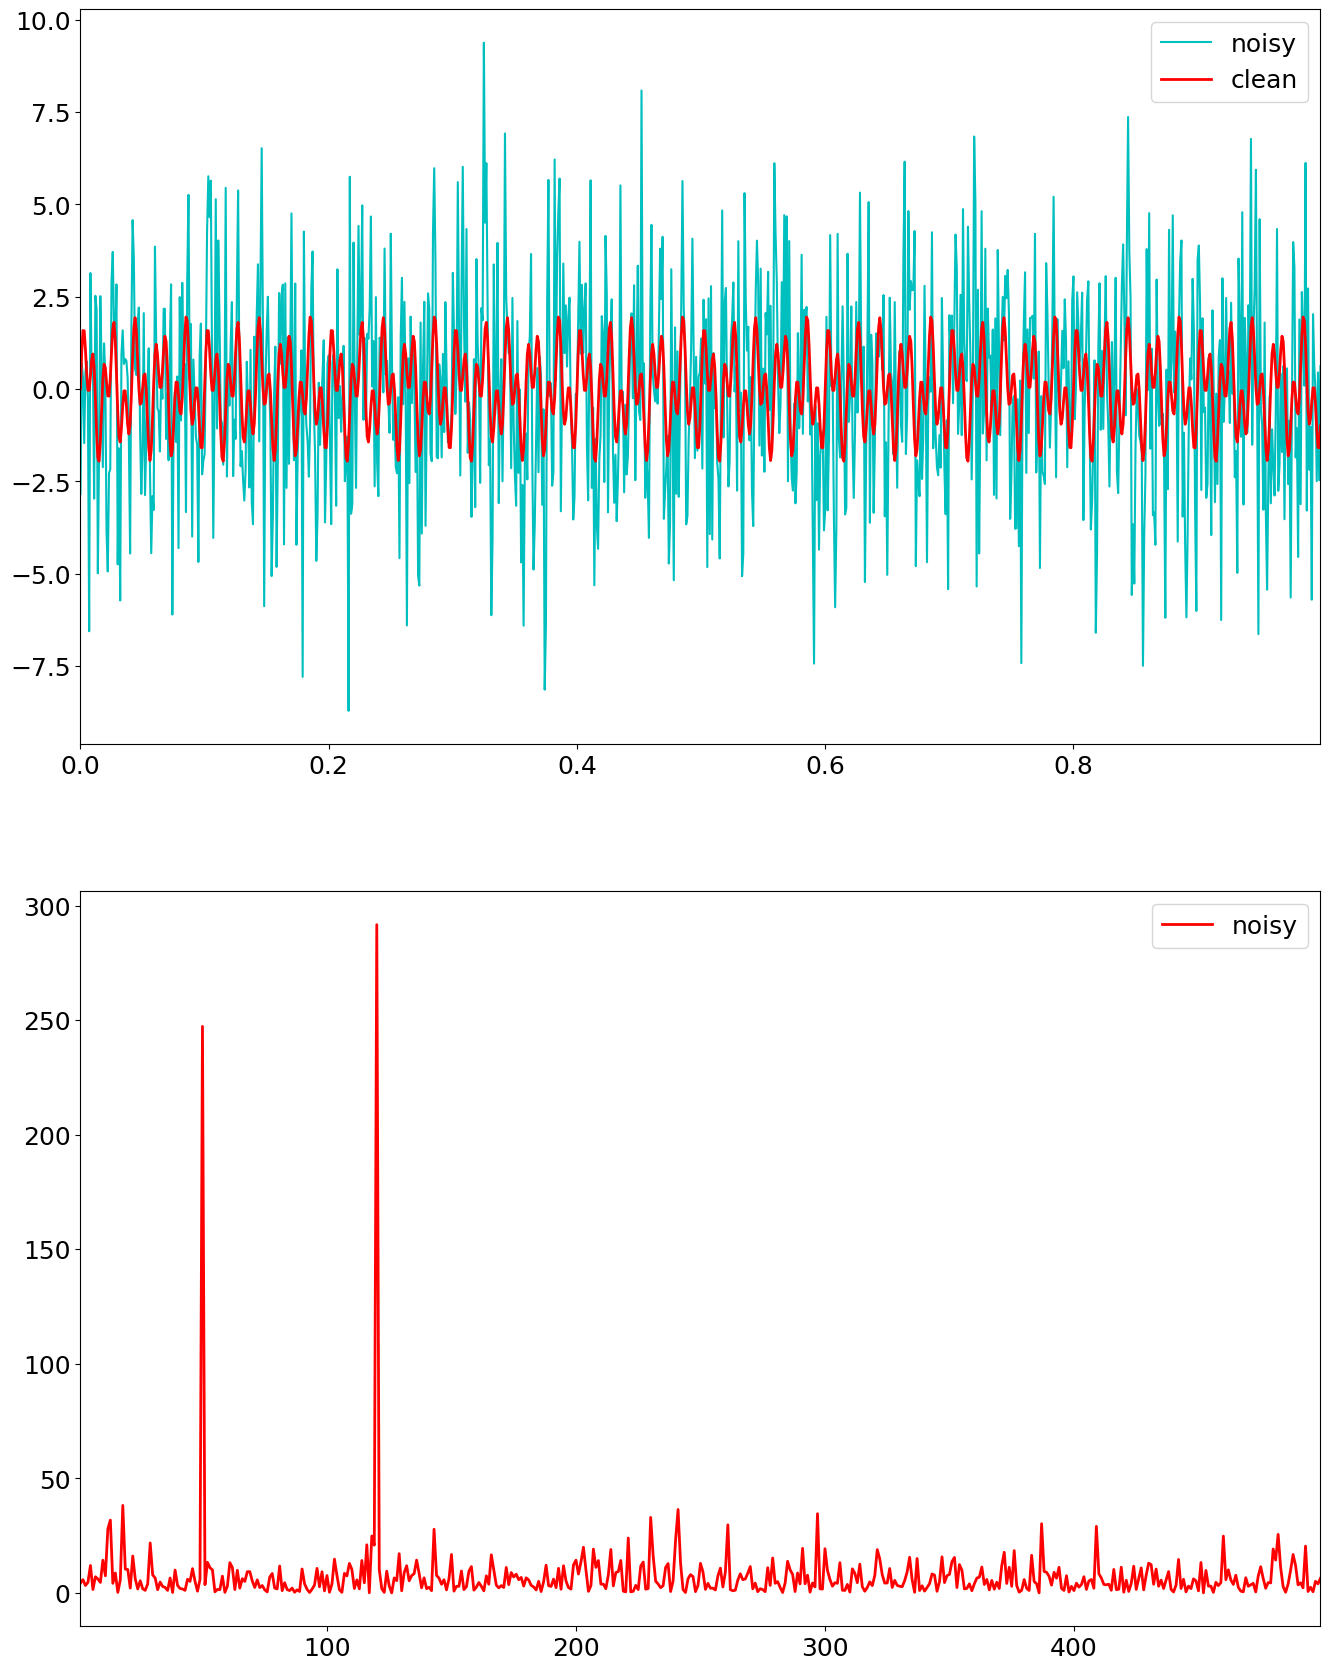

In [ ]:
#compute fft
n=len(t)
fhat=np.fft.fft(f,n)
PSD=fhat*np.conj(fhat)/n
freq=(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')
fig,axs=plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label="noisy")
plt.plot(t,f_clean,color='r',linewidth=2,label="clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])#set current access
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label="noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()



In [ ]:
#filtering noise
indices=PSD>100 #finding all freq with larger power
# print(indices)
PSDclean=PSD*indices#zero out all other
# print(PSDclean)
fhat=indices*fhat#zero out small fourier coeff in Y
ffilt=np.fft.ifft(fhat)#inverse FFT for filtered time signal

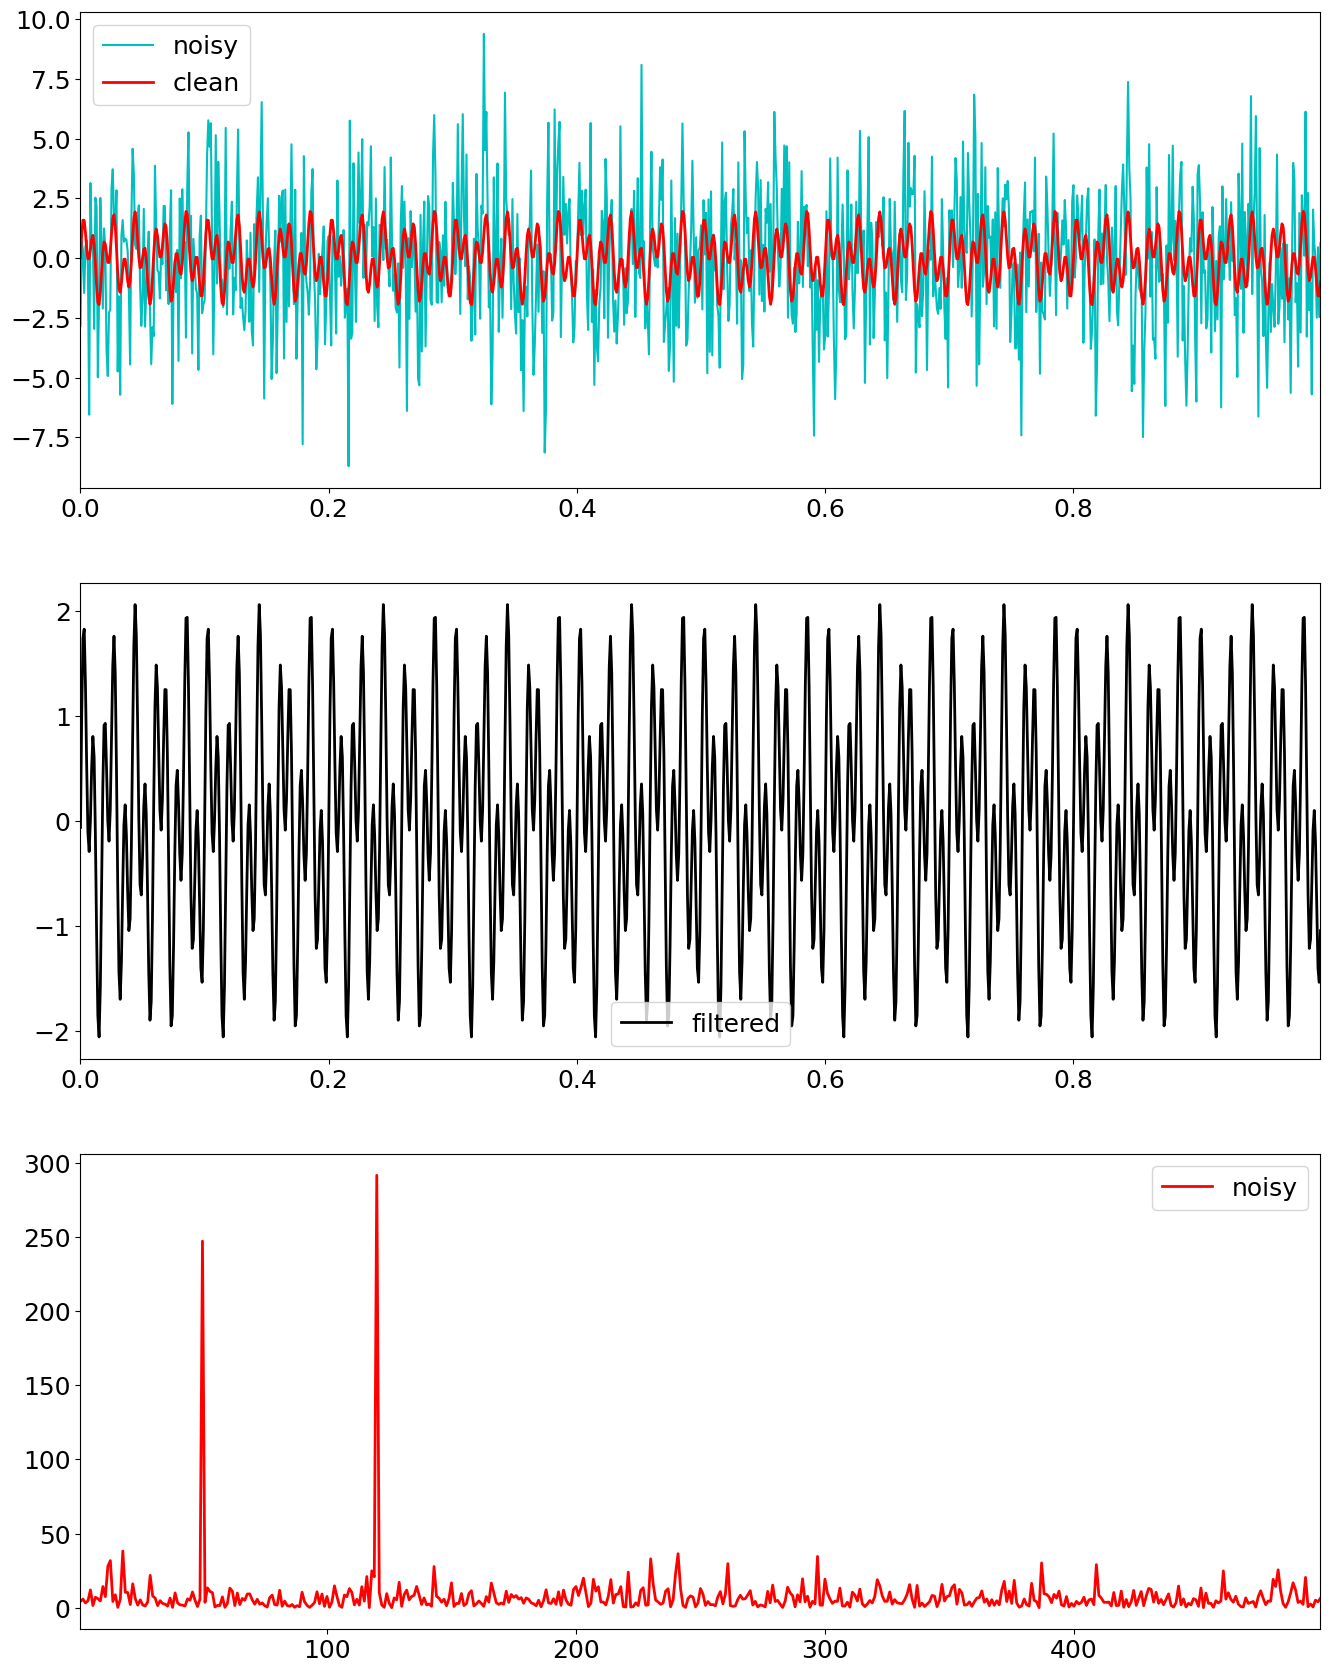

In [ ]:
fig,axs=plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label="noisy")
plt.plot(t,f_clean,color='r',linewidth=2,label="clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color="k",linewidth=2,label="filtered")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])#set current access
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label="noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()
